# Kidney Tumor data set
## Emily Isko and Joe Jessee
### Biof509: Applied Machine Learning

Data used in this project was downloaded from https://portal.gdc.cancer.gov/projects/TCGA-KIRC

Project ID:	TCGA-KIRC

DbGaP Study Accession:	phs000178

Project Name:	Kidney Renal Clear Cell Carcinoma

Disease Type:	Adenomas and Adenocarcinomas

Primary Site:	Kidney


There are **28** variables and **537** data entries/observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [11]:
# importing data
data = pd.read_csv("clinical.tsv", sep='\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 28 columns):
case_id                              537 non-null object
submitter_id                         537 non-null object
project_id                           537 non-null object
gender                               537 non-null object
year_of_birth                        537 non-null int64
race                                 537 non-null object
ethnicity                            537 non-null object
year_of_death                        537 non-null object
classification_of_tumor              537 non-null object
last_known_disease_status            537 non-null object
primary_diagnosis                    537 non-null object
tumor_stage                          537 non-null object
age_at_diagnosis                     537 non-null object
vital_status                         537 non-null object
morphology                           537 non-null object
days_to_death                        537 

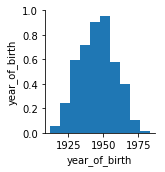

In [12]:
sb.pairplot(data)

## What to do with empty entries

In this data set, empty entries were often denoted with **--** or **not reported**

We changed this to NaN as appropriate.

In [3]:
# replace -- with Nan
data = data.replace('--', np.nan)
data = data.replace('not reported', np.nan)

# keep not reported in categorical variable, ethnicity and race
data['ethnicity'] = data['ethnicity'].replace(np.nan, 'not reported')
data['race'] = data['race'].replace(np.nan, 'not reported')


In [4]:
# looking at where the empty data are
print(data.isna().sum())

data.head()

case_id                                0
submitter_id                           0
project_id                             0
gender                                 0
year_of_birth                          0
race                                   0
ethnicity                              0
year_of_death                        375
classification_of_tumor              537
last_known_disease_status            537
primary_diagnosis                      0
tumor_stage                            3
age_at_diagnosis                       1
vital_status                           0
morphology                             0
days_to_death                        360
days_to_last_known_disease_status    537
days_to_recurrence                   537
tumor_grade                          537
tissue_or_organ_of_origin              0
days_to_birth                          1
progression_or_recurrence            537
prior_malignancy                     537
site_of_resection_or_biopsy            0
days_to_last_fol

case_id  submitter_id project_id gender  \
0  8f936d84-3b81-4d1c-aca1-93f5c86ed1bc  TCGA-BP-5198  TCGA-KIRC   male   
1  26cc2c84-aaec-4cd1-9c45-dd08d372128d  TCGA-B0-4706  TCGA-KIRC   male   
2  4cfe4f31-f62c-423a-8b9f-17f455b15313  TCGA-BP-4760  TCGA-KIRC   male   
3  e0127e51-43ba-4536-bc9d-004591f9c627  TCGA-CZ-5462  TCGA-KIRC   male   
4  97fee782-9aa3-41c7-8b7b-53c9c69bdabc  TCGA-AK-3427  TCGA-KIRC   male   

   year_of_birth                       race               ethnicity  \
0           1936                      white            not reported   
1           1946                      white  not hispanic or latino   
2           1935  black or african american  not hispanic or latino   
3           1924                      white            not reported   
4           1939                      white  not hispanic or latino   

  year_of_death  classification_of_tumor  last_known_disease_status  ...  \
0           NaN                      NaN                        NaN  ...   
1          2007                      NaN                        NaN  ...   
2           NaN                      NaN                        NaN  ...   
3          2007                      NaN                        NaN  ...   
4           NaN                      NaN                        NaN  ...   

  tumor_grade tissue_or_organ_of_origin days_to_birth  \
0         NaN               Kidney, NOS      -26360.0   
1         NaN               Kidney, NOS      -22331.0   
2         NaN               Kidney, NOS      -25268.0   
3         NaN               Kidney, NOS      -30659.0   
4         NaN               Kidney, NOS      -24067.0   

  progression_or_recurrence prior_malignancy site_of_resection_or_biopsy  \
0                       NaN              NaN                 Kidney, NOS   
1                       NaN              NaN                 Kidney, NOS   
2                       NaN              NaN                 Kidney, NOS   
3                       NaN              NaN                 Kidney, NOS   
4                       NaN              NaN                 Kidney, NOS   

   days_to_last_follow_up  therapeutic_agents  treatment_intent_type  \
0                   603.0                 NaN                    NaN   
1                    26.0                 NaN                    NaN   
2                  2361.0                 NaN                    NaN   
3                     NaN                 NaN                    NaN   
4                  3583.0                 NaN                    NaN   

  treatment_or_therapy  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 28 columns]

Note that some variables have no recorded data or 1 variable for all entries. We will delete these columns as they are irrelevant.

In [5]:
# Delete columns with only 1 

delete_cols = ['case_id', 'project_id','classification_of_tumor',
       'last_known_disease_status', 'morphology','days_to_last_known_disease_status', 'days_to_recurrence','tumor_grade', 'tissue_or_organ_of_origin', 'days_to_birth','progression_or_recurrence', 'prior_malignancy',
       'site_of_resection_or_biopsy', 'therapeutic_agents', 'treatment_intent_type', 'treatment_or_therapy']

data = data.drop(delete_cols, axis=1)



data.shape

(537, 12)

New data frame only has 13 variables.

## Modifying data types to encode meaningful information

Certain variables are encoded as categorical data (i.e. string objects) when the variable actually contains numeric data.

### Tumor stage

In this variable, tumor stage, the data for this variable is imported as a string object. Instead, we wanted the stages to be encoded as ranked integers. To do this, we replaced each stage with integers.

In [6]:
print("Before Replacement")
print(data.tumor_stage.head())

data = data.replace('stage i', 1)
data = data.replace('stage ii', 2)
data = data.replace('stage iii', 3)
data = data.replace('stage iv', 4)


print('\n')
print("After Replacement:")
print(data.tumor_stage.head())


Before Replacement
0    stage iii
1    stage iii
2      stage i
3     stage iv
4      stage i
Name: tumor_stage, dtype: object


After Replacement:
0    3.0
1    3.0
2    1.0
3    4.0
4    1.0
Name: tumor_stage, dtype: float64


## Encoding numerical data

We identified which variables should be encoded as numeric variables (anything related to year, age, or days) and converted the data types to floats.

In [7]:
to_float = ['year_of_birth','year_of_death', 'tumor_stage','age_at_diagnosis', 'days_to_death', 'days_to_last_follow_up']

for col in to_float:
    data[col] = data[col].astype('float64')


    
# add new column age_at_death
data['age_at_death'] = data['age_at_diagnosis'] + data['days_to_death']
    
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 13 columns):
submitter_id              537 non-null object
gender                    537 non-null object
year_of_birth             537 non-null float64
race                      537 non-null object
ethnicity                 537 non-null object
year_of_death             162 non-null float64
primary_diagnosis         537 non-null object
tumor_stage               534 non-null float64
age_at_diagnosis          536 non-null float64
vital_status              537 non-null object
days_to_death             177 non-null float64
days_to_last_follow_up    384 non-null float64
age_at_death              176 non-null float64
dtypes: float64(7), object(6)
memory usage: 54.6+ KB


## Is there redundancy in the data?

We represented the data in a correlation matrix to identify redundant variables that may be encoding the same information.

/home/joejessee/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/joejessee/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


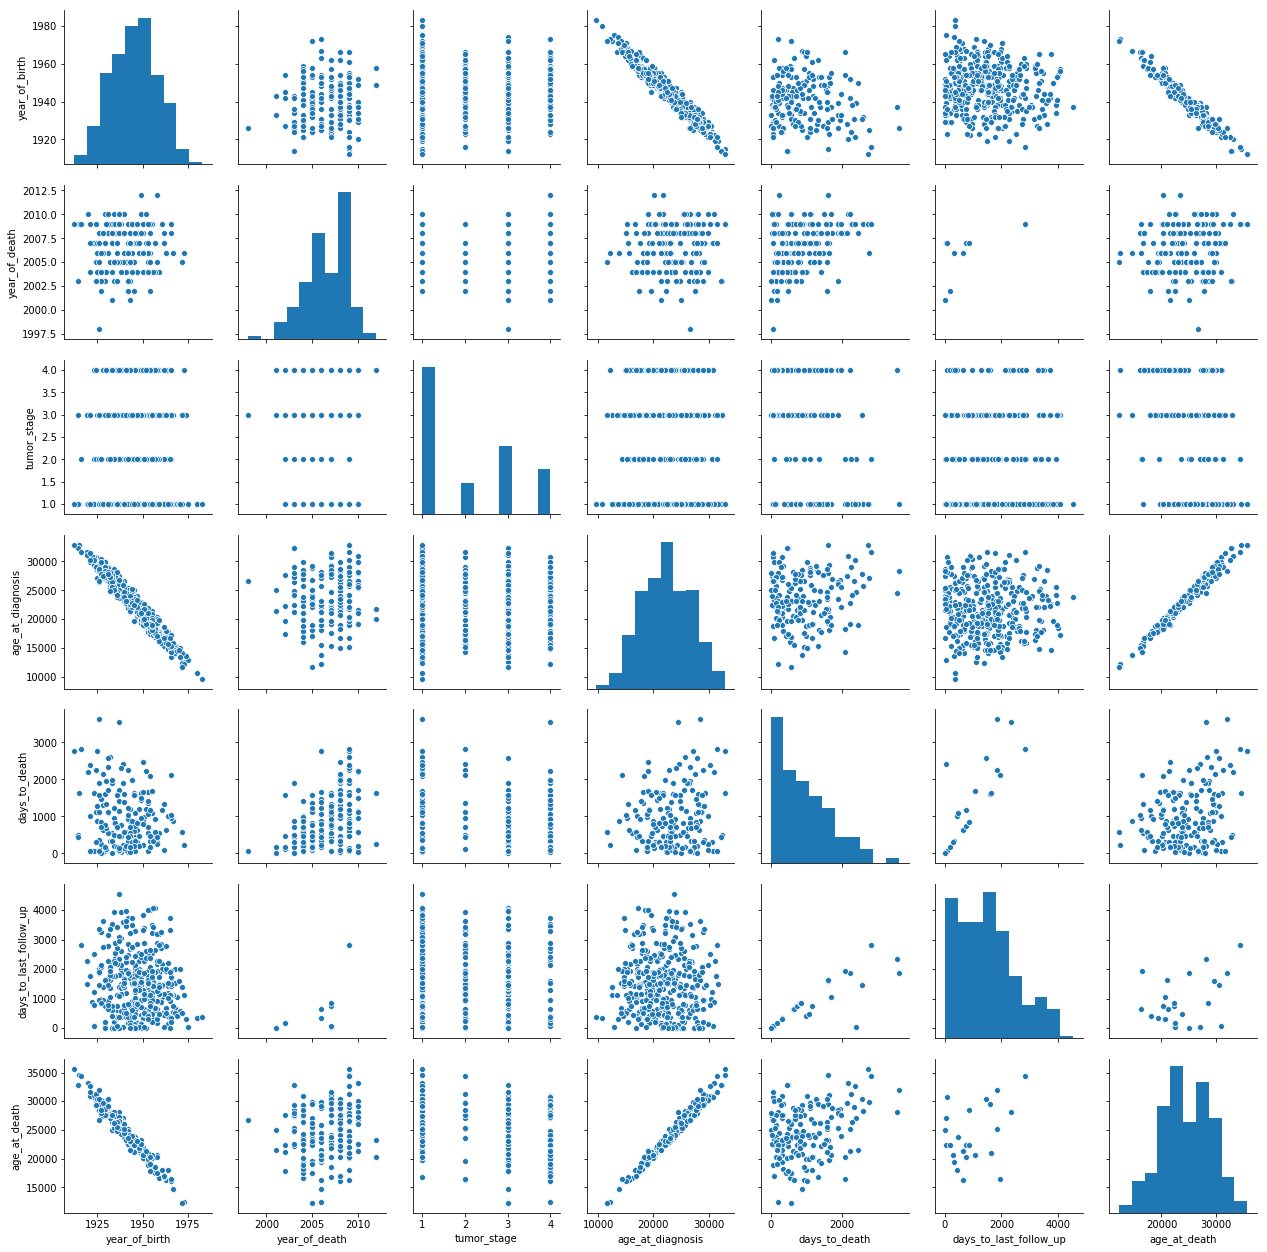

In [8]:
sb.pairplot(data)

# Data visualization

object
object
gender  is a string type
float64
year_of_birth  is a number
object
race  is a string type
object
ethnicity  is a string type
float64
year_of_death  is a number
object
primary_diagnosis  is a string type
float64
tumor_stage  is a number
float64
age_at_diagnosis  is a number
object
vital_status  is a string type
float64
days_to_death  is a number
float64
days_to_last_follow_up  is a number
float64
age_at_death  is a number


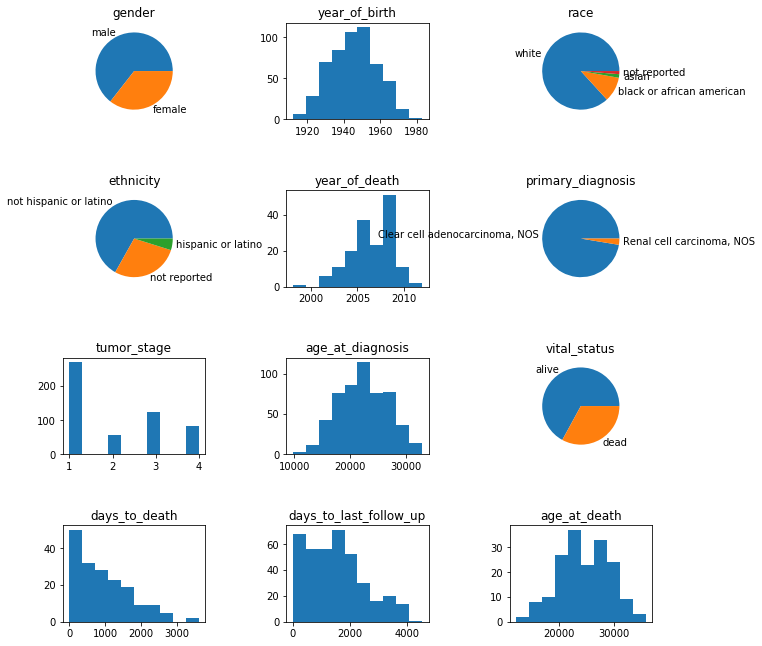

In [9]:
from pandas.api.types import is_string_dtype

fig, axs = plt.subplots(4,3, figsize=(10,10))
fig.tight_layout(pad=5) 
i = 0
j = 0


for col in data:
    print(data[col].dtype)
    dtype = data[col].dtype
    valcounts = data[col].value_counts()
    
    if col == "submitter_id":
        continue
    elif is_string_dtype(data[col]):
        print(data[col].name, " is a string type")
        vals = valcounts.values.tolist()
        names = valcounts.index.tolist()
        
        axs[i,j].pie(vals, labels = names)
        axs[i,j].set_title(col)
        
    else:
        print(data[col].name, " is a number")
        axs[i,j].hist(data[col])
        axs[i,j].set_title(col)
    
    
    if j < 2:
        j += 1
    else:
        i += 1
        j = 0
        
        

plt.show()

In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
